# Feature Extraction Using GeoPandas

Import modules

In [39]:
import numpy as np
import geopandas as pd
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt

In [35]:
#reading vector
shapefile_path = r"T:\Luke_Brown\for_Bhargav\ComEd_802B_Initial_Polys_Joined_KH_elby_v2.shp"
rasterfile_path = r"T:\Luke_Brown\for_Bhargav\ComEd22_20220802B_REFL_Resize_Mosaic.bsq"
# vector = pd.read_file(shapefile_path)

#Subsetting to AOI
#Vector=Vector[Vector[#####]==#####]

#reading raster  
# raster = rasterio.open(rasterfile_path)

#set the coordinate system to same
# Vector = vector.to_crs(raster.crs)

#clipping raster to vector
# raster_clipped = rasterio.open(rasterfile_path, bbox=vector.total_bounds)  # figure out how to read a clipped raster

with pd.read_file(shapefile_path) as vector:
    with rasterio.open(rasterfile_path, bbox=vector.total_bounds) as raster_clipped:
        Vector = vector.to_crs(raster_clipped.crs)
        #looping over each row in geometry dataframe
        Pixel_values = []
        for index, dict in Vector.iterrows():  # rename dict to something else because dict is a python built-in function
            geometry = dict["geometry"]
            # print(geometry)
            masked, out_transform = mask(raster_clipped, [geometry], crop=True, all_touched=False)
            Pixel_values.append(masked)
    

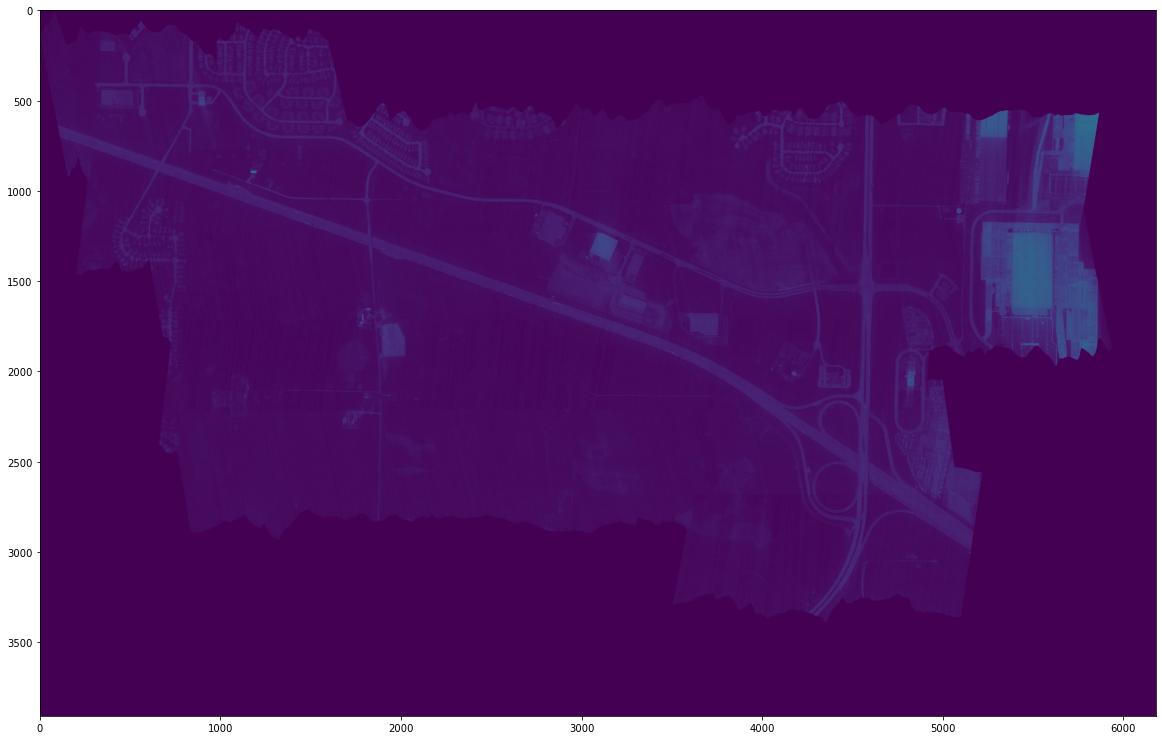

In [24]:
Vector.plot(figsize=(20,13))
plt.imshow(raster.read(1))

In [41]:
Pixel_values[-1][0][Pixel_values[-1][0] != 0]

array([439, 274, 540, 400, 450, 356, 454, 223, 368, 355, 269, 393, 392,
       366, 316, 265, 247, 213, 206, 355, 269, 507, 199, 133, 262, 181,
       446, 387, 301, 388, 229, 385, 266, 361, 268, 125, 125, 427, 295,
       165, 408, 662, 251, 235, 339,  27, 287, 287, 117, 218, 409, 212,
       228, 501, 343, 270, 206, 254, 254,  99, 192, 354, 134, 247, 423,
       364, 363, 255, 255, 220, 188, 170, 220, 331, 199, 374, 382, 290,
       123,  61, 383, 241, 311, 341, 256, 111, 396, 191, 201, 383, 286,
       435, 222, 218, 319, 319, 214, 440, 389, 157, 177], dtype=int16)